In [2]:
# Standard module imports
import numpy as np
import scipy.stats as stats
import pandas as pd

%matplotlib inline

# Useful directories
gh_dir = '/Users/ttshimiz/Github/'
sed_fit_dir = gh_dir + 'bat-agn-sed-fitting/'
casey_dir = sed_fit_dir + 'analysis/casey_bayes_results/'
data_dir = gh_dir + 'bat-data/'

In [10]:
# Setup the figures
execfile('../code/figure-setup.py')

In [5]:
# Upload the fitting results for each model
bat_casey = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/casey_bayes_results/beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior.csv', index_col=0)
bat_casey_undetected = pd.read_csv(casey_dir+'beta_fixed_2_wturn_gaussianPrior/final_fit_results_beta_fixed_2_wturn_gaussianPrior_undetected.csv', index_col=0)

bat_decompir = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_mle.csv', index_col=0)
bat_decompir_uncertain = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_uncertainties.csv', index_col=0)
bat_decompir = bat_decompir.join(bat_decompir_uncertain)
bat_decompir_undetected = pd.read_csv(sed_fit_dir+'analysis/decompir_results/sb+arp220/final_fit_results_decompir_sb_and_arp220_undetected.csv', index_col=0)

bat_dale14 = pd.read_csv('/Users/ttshimiz/Github/bat-agn-sed-fitting/analysis/dale14_results/final_fit_results_dale14.csv', index_col=0)
bat_dale14_undetected = pd.read_csv(sed_fit_dir+'analysis/dale14_results/final_fit_results_dale14_undetected.csv', index_col=0)

# Remove 'bad' sources
bad_sources = np.array(['PICTORA', '3C111.0', '3C120',
                        '2MASXJ23272195+1524375', 'PKS2331-240',
                        'HB890241+622', 'Mrk3'])
bat_casey = bat_casey.drop(bad_sources)
bat_decompir = bat_decompir.drop(bad_sources)
bat_dale14 = bat_dale14.drop(bad_sources)

# Upload the info for the BAT AGN (i.e. AGN type, luminosity distance, redshift, etc)
bat_info = pd.read_csv(data_dir+'bat_info.csv', index_col=0)

In [12]:
# Combine the total IR luminosities into one DataFrame
bat_lir = pd.DataFrame(index=bat_info.index)
bat_lir['LIR_C12'] = bat_casey['lir_total']
bat_lir['LIR_DecompIR'] = bat_decompir['lir_total']
bat_lir['LIR_Dale14'] = bat_dale14['lir_total']

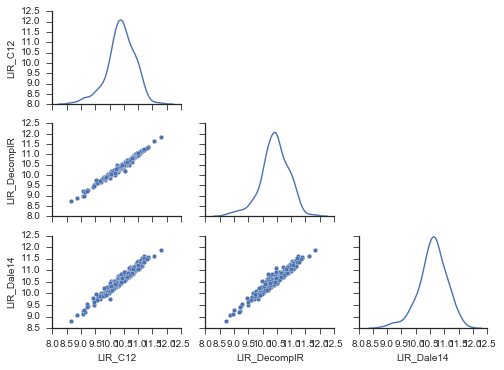

In [17]:
# Plot the correlation between each LIR using seaborn's pairplot method
g = sn.pairplot(bat_lir, diag_kind="kde", size=1./4*textwidth, aspect=4./3.)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)
g.fig.savefig(figsave_dir+'lir_total-comparison.pdf', bbox_inches='tight')